P P3. REDES NEURONALES

* Alumno: José Antonio Sánchez Benito
* Matricula: 635049N

En este proyecto desarrollaré un modelo de predicción para predecir imagenes de numeros de los dígitos del 0 al 9. El modelo utilizado es de redes neuronales, se realizara una evaluación de test ciego, y se evidenciara su funcionalidad en tiempo real.

In [ ]:
# Conectar Google Drive con Google Colab
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



Importé las imágenes a mi ambiente de trabajo utilizando el método flow_from_directory de Keras junto con un objeto de clase ImageDataGenerator. Me aseguré de transformar las imágenes para que estuvieran en escala de grises y escalarlas al rango [0-1].


cantidad de imagenes generadas en el ENTRENAMIENTO
Found 3138 images belonging to 10 classes.
 
cantidad de imagenes para VALIDACIÓN(20%)
Found 778 images belonging to 10 classes.
 
Imagenes del conjunto de PRUEBA
Found 1019 images belonging to 10 classes.

Clases encontradas en el conjunto de entrenamiento:
{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}

Ejemplo de etiquetas (one-hot encoding):
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


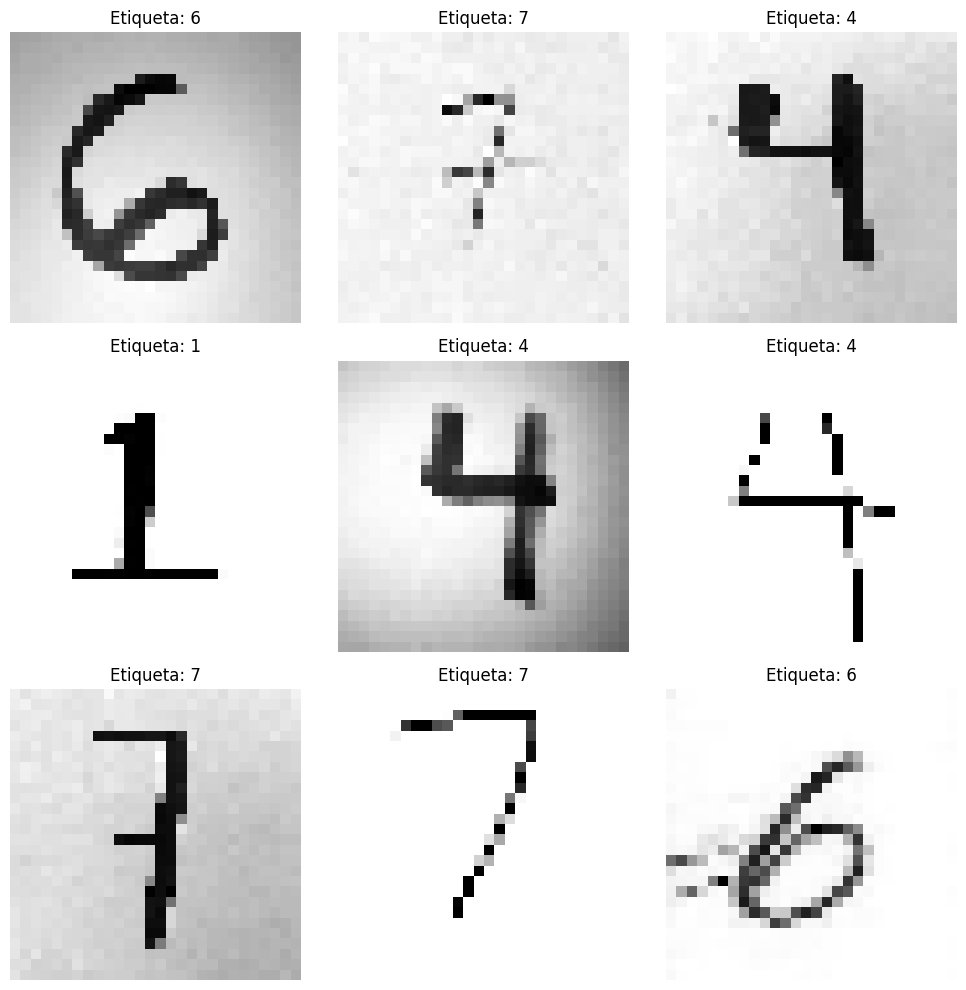

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Directorios de los conjuntos de entrenamiento y prueba
train_dir = '/content/drive/MyDrive/Numbers/Train'
test_dir = '/content/drive/MyDrive/Numbers/Test'

# Configuración del generador de datos
image_generator = ImageDataGenerator(
    rescale=1./255,         # Escalar los píxeles al rango [0, 1]
    validation_split=0.2    # Reservar el 20% de los datos para validación
)

# Configuración de parámetros
batch_size = 32
img_height = 28
img_width = 28
color_mode = 'grayscale'   # Convertir imágenes a escala de grises

# Generador de datos para el conjunto de entrenamiento
print("cantidad de imagenes generadas en el ENTRENAMIENTO")
train_data_gen = image_generator.flow_from_directory(
    directory=train_dir,
    target_size=(img_height, img_width),  # Redimensionar a 28x28
    batch_size=batch_size,
    color_mode=color_mode,                # Escala de grises
    class_mode='categorical',             # Etiquetas en formato one-hot encoding
    subset='training',                    # Subconjunto de entrenamiento
    shuffle=True                          # Mezclar imágenes
)
print(" ")
print("cantidad de imagenes para VALIDACIÓN(20%)")
# Generador de datos para el conjunto de validación
val_data_gen = image_generator.flow_from_directory(
    directory=train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode=color_mode,
    class_mode='categorical',
    subset='validation',                  # Subconjunto de validación
    shuffle=True
)
print(" ")
print("Imagenes del conjunto de PRUEBA")
# Generador de datos para el conjunto de prueba
test_data_gen = image_generator.flow_from_directory(
    directory=test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode=color_mode,
    class_mode='categorical',
    shuffle=False                         # No mezclar para mantener el orden
)

# Verificar las clases encontradas
print("\nClases encontradas en el conjunto de entrenamiento:")
print(train_data_gen.class_indices)

# Mostrar etiquetas de algunas imágenes del conjunto de entrenamiento
batch_images, batch_labels = next(train_data_gen)  # Obtener un batch del generador
print("\nEjemplo de etiquetas (one-hot encoding):")
print(batch_labels[:5])

# Opcional: Visualizar algunas imágenes y sus etiquetas
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(batch_images[i].squeeze(), cmap='gray')  # Eliminar la dimensión del canal
    plt.title(f"Etiqueta: {np.argmax(batch_labels[i])}")  # Mostrar la clase de la etiqueta
    plt.axis('off')
plt.tight_layout()
plt.show()

CONSTRUCCIÓN DE ARQUITECTURA DE REDES NEURONALES CONVOLUCIONALES

In [ ]:
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Definir la arquitectura del modelo
model = models.Sequential()

# Primera capa convolucional
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Segunda capa convolucional
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Tercera capa convolucional
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))

# Capa Flatten
model.add(layers.Flatten())

# Capa fully connected (densa)
model.add(layers.Dense(64, activation='relu'))

# Capa de salida
model.add(layers.Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Mostrar la arquitectura del modelo
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         401,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 494,794 (1.89 MB)

 Trainable params: 494,794 (1.89 MB)

 Non-trainable params: 0 (0.00 B)

ENTRENAMIENTO DEL MODELO


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Crear callback de EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=30,  # Número de épocas
    callbacks=[early_stop]
)


NameError: name 'val_data' is not defined

VISUALIZACIÓN DE DESEMPEÑO

NameError: name 'history' is not defined

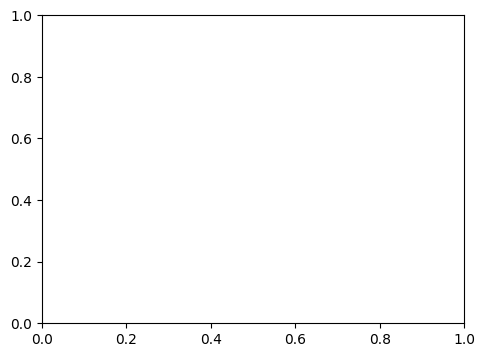

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))


# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


99/99 ━━━━━━━━━━━━━━━━━━━━ 2674s 25s/step - accuracy: 0.1484 - loss: 2.2446 - val_accuracy: 0.4165 - val_loss: 1.7422
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 40s 381ms/step - accuracy: 0.5301 - loss: 1.4606 - val_accuracy: 0.6105 - val_loss: 1.3428
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 44s 409ms/step - accuracy: 0.6505 - loss: 1.1209 - val_accuracy: 0.6632 - val_loss: 1.1186
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 39s 369ms/step - accuracy: 0.7199 - loss: 0.8936 - val_accuracy: 0.7339 - val_loss: 0.9768
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 44s 414ms/step - accuracy: 0.7830 - loss: 0.7095 - val_accuracy: 0.7918 - val_loss: 0.8453
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 78s 381ms/step - accuracy: 0.8197 - loss: 0.6240 - val_accuracy: 0.8059 - val_loss: 0.7464
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 44s 410ms/step - accuracy: 0.8359 - loss: 0.5237 - val_accuracy: 0.7879 - val_loss: 0.7403
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 40s 378ms/step - accuracy: 0.8519 - loss: 0.4625 - val_accuracy: 0.781

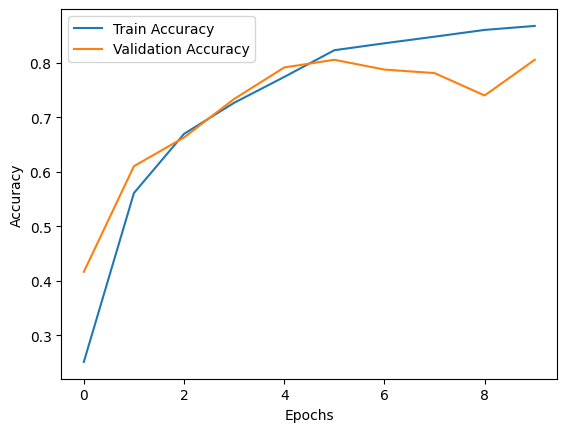

In [ ]:
# Construir la arquitectura de la red neuronal convolucional
model = models.Sequential([
    Input(shape=(28, 28, 1)),  # Usar Input explícito para evitar advertencias
    layers.Conv2D(32, (3, 3), activation='relu'),  # Capa 1: convolucional
    layers.MaxPooling2D((2, 2)),  # Capa 2: pooling
    layers.Conv2D(64, (3, 3), activation='relu'),  # Capa 3: convolucional
    layers.MaxPooling2D((2, 2)),  # Capa 4: pooling
    layers.Conv2D(64, (3, 3), activation='relu'),  # Capa 5: convolucional
    layers.Flatten(),  # Capa 6: aplanamiento
    layers.Dense(64, activation='relu'),  # Capa 7: densa
    layers.Dense(10, activation='softmax')  # Capa 8: salida
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    train_data,  # Datos de entrenamiento
    validation_data=val_data,  # Datos de validación
    epochs=10  # Número de épocas
)

# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Graficar los resultados
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()